### Импорт библиотек

In [210]:
from pandas import Series
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve

In [12]:
#загрузка данных
train = pd.read_csv("train.csv", encoding = 'ISO-8859-1', low_memory = False)
test = pd.read_csv("test.csv", encoding = 'ISO-8859-1', low_memory = False)

#### Предварительный анализ

In [14]:
print (f'Тренировочный датасет {train.shape}') 
print (f'Тестовый датасет {test.shape}') 

Тренировочный датасет (73799, 19)
Тестовый датасет (36349, 18)


In [15]:
train.columns

Index(['client_id', 'app_date', 'education', 'sex', 'age', 'car', 'car_type',
       'decline_app_cnt', 'good_work', 'score_bki', 'bki_request_cnt',
       'region_rating', 'home_address', 'work_address', 'income', 'sna',
       'first_time', 'foreign_passport', 'default'],
      dtype='object')

In [16]:
test.columns

Index(['client_id', 'app_date', 'education', 'sex', 'age', 'car', 'car_type',
       'decline_app_cnt', 'good_work', 'score_bki', 'bki_request_cnt',
       'region_rating', 'home_address', 'work_address', 'income', 'sna',
       'first_time', 'foreign_passport'],
      dtype='object')

In [30]:
resume_1 = 'В тренировочном датасете 73799 записей и 19 столбцов, в тестовом 36349 и 18 столбцов. В тестовом нет финального показателя default'

In [31]:
train.isnull().sum()

client_id             0
app_date              0
education           307
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
default               0
dtype: int64

In [18]:
test.isnull().sum()

client_id             0
app_date              0
education           171
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
dtype: int64

In [32]:
resume_2 = 'Пустые значения только для параметра education: 307 пропусков в тренировочном и 171 в тестовом'

In [37]:
train.dtypes

client_id             int64
app_date             object
education            object
sex                  object
age                   int64
car                  object
car_type             object
decline_app_cnt       int64
good_work             int64
score_bki           float64
bki_request_cnt       int64
region_rating         int64
home_address          int64
work_address          int64
income                int64
sna                   int64
first_time            int64
foreign_passport     object
default               int64
dtype: object

In [38]:
test.dtypes

client_id             int64
app_date             object
education            object
sex                  object
age                   int64
car                  object
car_type             object
decline_app_cnt       int64
good_work             int64
score_bki           float64
bki_request_cnt       int64
region_rating         int64
home_address          int64
work_address          int64
income                int64
sna                   int64
first_time            int64
foreign_passport     object
dtype: object

In [19]:
train.nunique().values

array([73799,   120,     5,     2,    52,     2,     2,    21,     2,
       69096,    38,     7,     3,     3,   966,     4,     4,     2,
           2])

In [20]:
test.nunique().values

array([36349,   120,     5,     2,    51,     2,     2,    19,     2,
       34287,    34,     7,     3,     3,   685,     4,     4,     2])

In [24]:
test.describe(include='all').loc['max']

client_id            110148
app_date                NaN
education               NaN
sex                     NaN
age                      71
car                     NaN
car_type                NaN
decline_app_cnt          30
good_work                 1
score_bki           0.18882
bki_request_cnt          47
region_rating            80
home_address              3
work_address              3
income                1e+06
sna                       4
first_time                4
foreign_passport        NaN
Name: max, dtype: object

In [23]:
test.describe(include='all').loc['min']

client_id                4
app_date               NaN
education              NaN
sex                    NaN
age                     21
car                    NaN
car_type               NaN
decline_app_cnt          0
good_work                0
score_bki          -3.5742
bki_request_cnt          0
region_rating           20
home_address             1
work_address             1
income                1000
sna                      1
first_time               1
foreign_passport       NaN
Name: min, dtype: object

In [33]:
train.describe(include='all').loc['min']

client_id                 1
app_date                NaN
education               NaN
sex                     NaN
age                      21
car                     NaN
car_type                NaN
decline_app_cnt           0
good_work                 0
score_bki          -3.62459
bki_request_cnt           0
region_rating            20
home_address              1
work_address              1
income                 1000
sna                       1
first_time                1
foreign_passport        NaN
default                   0
Name: min, dtype: object

In [34]:
train.describe(include='all').loc['max']

client_id             110147
app_date                 NaN
education                NaN
sex                      NaN
age                       72
car                      NaN
car_type                 NaN
decline_app_cnt           33
good_work                  1
score_bki           0.199773
bki_request_cnt           53
region_rating             80
home_address               3
work_address               3
income                 1e+06
sna                        4
first_time                 4
foreign_passport         NaN
default                    1
Name: max, dtype: object

In [41]:
train.sex.value_counts()

F    41562
M    32237
Name: sex, dtype: int64

In [40]:
train.foreign_passport.value_counts()

N    62733
Y    11066
Name: foreign_passport, dtype: int64

In [43]:
train.car_type.value_counts()

N    59791
Y    14008
Name: car_type, dtype: int64

In [44]:
train.education.value_counts()

SCH    38860
GRD    23365
UGR     9816
PGR     1257
ACD      194
Name: education, dtype: int64

In [45]:
train.home_address.value_counts()

2    39956
1    32585
3     1258
Name: home_address, dtype: int64

In [46]:
train.work_address.value_counts()

3    44959
2    20506
1     8334
Name: work_address, dtype: int64

In [47]:
train.region_rating.value_counts()

50    27523
60    16075
40    12027
80    11469
70     6199
30      300
20      206
Name: region_rating, dtype: int64

In [49]:
train.sna.value_counts()

1    47301
4    11749
2    10626
3     4123
Name: sna, dtype: int64

In [50]:
train.first_time.value_counts()

3    31255
4    18737
1    12239
2    11568
Name: first_time, dtype: int64

In [57]:
train.app_date.nunique()

120

In [63]:
resume_3 = 'Числовые переменные - age, decline_app_cnt, bki_request_cnt, income'
resume_4 = 'Бинарные переменные -  sex, car, car_type, foreign_passport, good_work'
resume_5 = 'Категориальные перменные - education, home_address, work_address, sna, region_rating, first_time'
resume_6 = 'client_id - идентификатор, который не нужен; app_date - дата, принимает 120 значений'

In [96]:
num_cols = ['age', 'decline_app_cnt', 'bki_request_cnt', 'score_bki', 'income']
bin_cols = ['sex', 'car', 'car_type', 'foreign_passport', 'good_work']
cat_cols = ['education', 'home_address', 'work_address', 'sna', 'region_rating', 'first_time']

##### Итоги

In [65]:
print(resume_1)
print(resume_2)
print(resume_3)
print(resume_4)
print(resume_5)
print(resume_6)

В тренировочном датасете 73799 записей и 19 столбцов, в тестовом 36349 и 18 столбцов. В тестовом нет финального показателя default
Пустые значения только для параметра education: 307 пропусков в тренировочном и 171 в тестовом
Числовые переменные - age, decline_app_cnt, bki_request_cnt, income
Бинарные переменные -  sex, car, car_type, foreign_passport, good_work
Категориальные перменные - education, home_address, work_address, sna, region_rating, first_time
client_id - идентификатор, который не нужен; app_date - дата, принимает 120 значений


#### Заполню пропуски

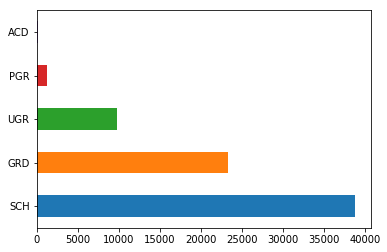

In [73]:
train.education.value_counts().plot.barh()

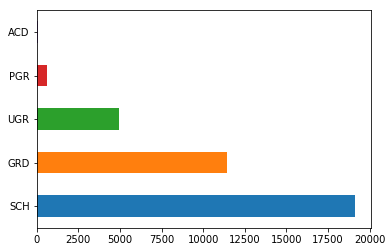

In [74]:
test.education.value_counts().plot.barh()

In [ ]:
#Самое популярное значение для education в обеих выборках - SCH. Заполню им пропуски

In [75]:
train.education.fillna(train.education.value_counts().index[0], inplace = True)
test.education.fillna(test.education.value_counts().index[0], inplace = True)

In [79]:
# Проверка
print('Пропуски в train -', train.isna().sum().sum())
print('Пропуски в test -', test.isna().sum().sum())

Пропуски в train - 0
Пропуски в test - 0


#### Визуализация

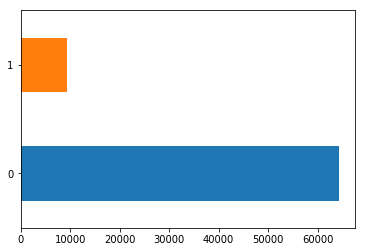

In [80]:
# Финальный показатель принимает значения 1 и 0. Значение 1 встречается реже
train.default.value_counts().plot.barh()

In [81]:
for col in num_cols:
    show_plot_boxplot(train[col], col, bins=50)

NameError: name 'show_plot_boxplot' is not defined

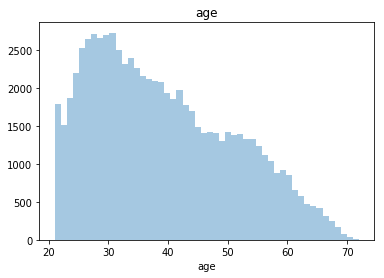

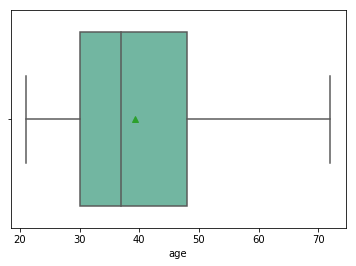

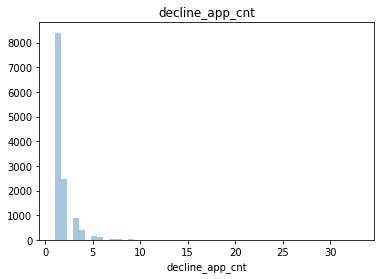

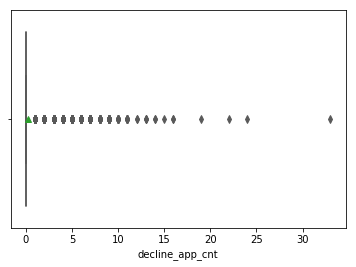

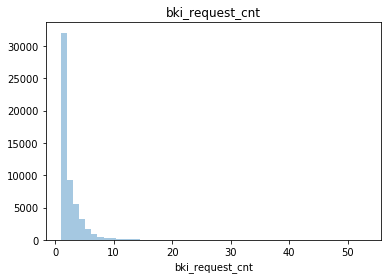

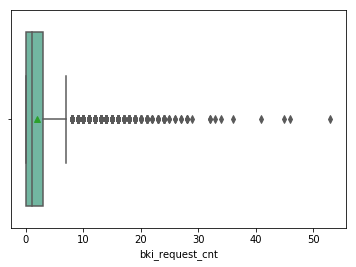

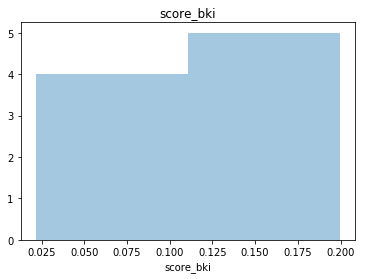

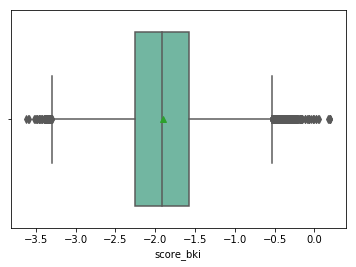

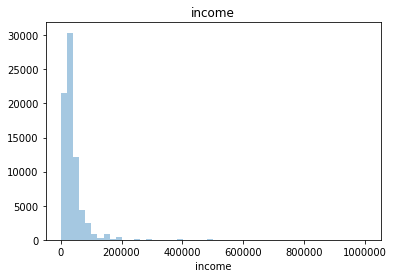

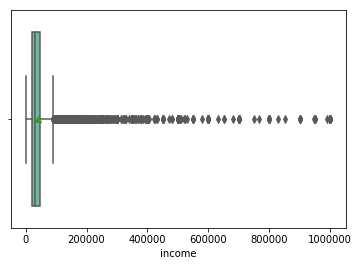

In [97]:
for i in num_cols:
    plt.figure()
    sns.distplot(train[i][train[i] > 0].dropna(), kde = False, rug=False)
    plt.title(i)
    plt.show()
    sns.boxplot(train[i], orient="h", palette="Set2", showmeans = True)

(array([   78.,  1342.,  7752., 18122., 21206., 15698.,  7250.,  1997.,
          324.,    30.]),
 array([-3.62458632, -3.2421504 , -2.85971449, -2.47727857, -2.09484265,
        -1.71240674, -1.32997082, -0.9475349 , -0.56509898, -0.18266307,
         0.19977285]),
 <a list of 10 Patch objects>)

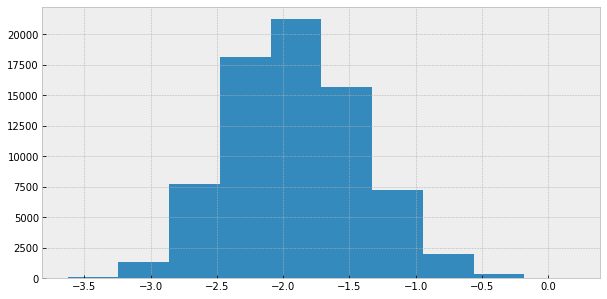

In [105]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.hist(train.score_bki)

In [ ]:
# Распределения всех числовых переменных age, decline_app_cnt, bki_request_cnt, income имеют тяжёлый правый хвост
# Так же есть выбросы, которые не подходят для логистической регрессии
# Распределение переменной score_bki выглядит нормальным

In [ ]:
# Логарифмирование переменных

In [110]:
train.age = np.log(train.age + 1)
train.decline_app_cnt = np.log(train.decline_app_cnt + 1)
train.bki_request_cnt = np.log(train.bki_request_cnt + 1)
train.income = np.log(train.income + 1)

test.age = np.log(test.age + 1)
test.decline_app_cnt = np.log(test.decline_app_cnt + 1)
test.bki_request_cnt = np.log(test.bki_request_cnt + 1)
test.income = np.log(test.income + 1)

In [111]:
# Графики после логарифмирования

/Users/habirova-rr/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


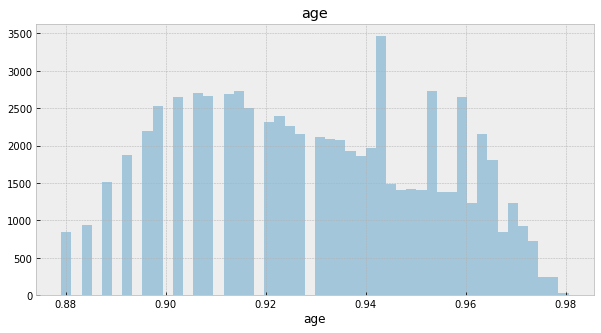

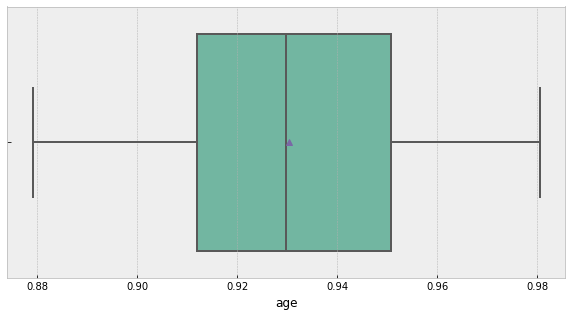

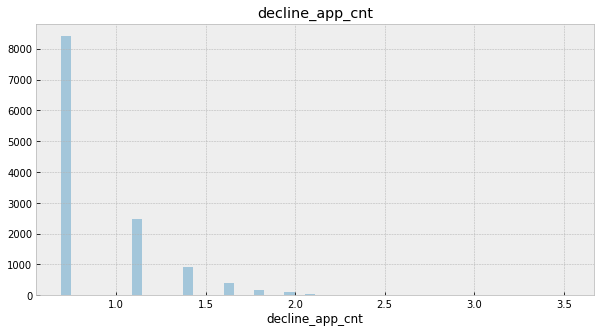

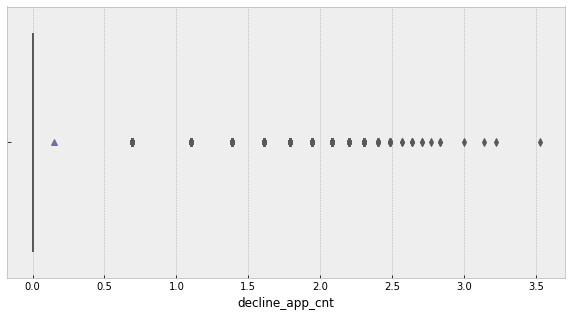

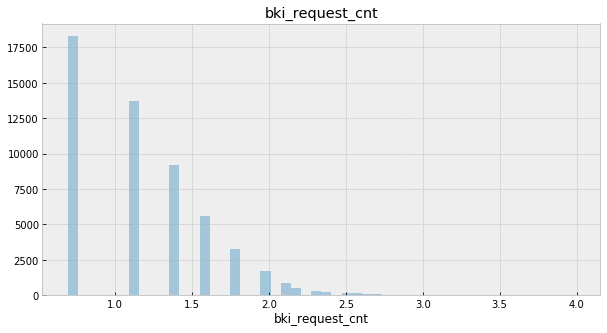

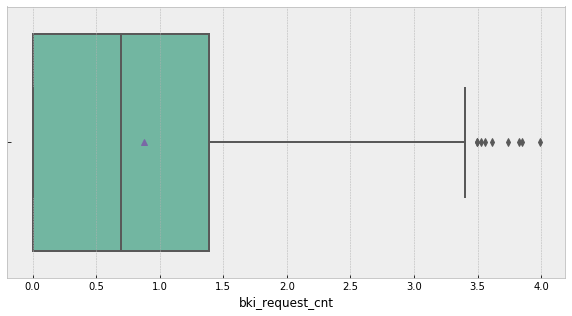

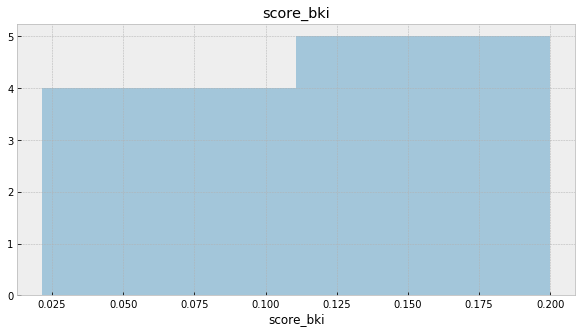

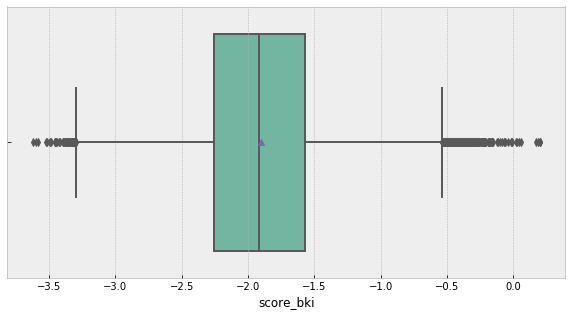

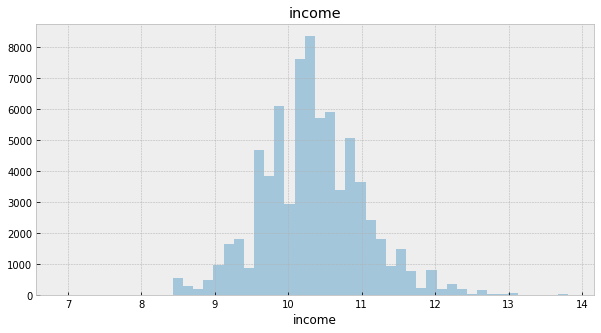

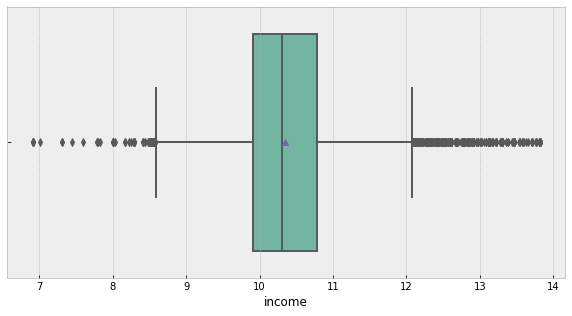

In [112]:
for i in num_cols:
    plt.figure()
    sns.distplot(train[i][train[i] > 0].dropna(), kde = False, rug=False)
    plt.title(i)
    plt.show()
    sns.boxplot(train[i], orient="h", palette="Set2", showmeans = True)

#### Оценка корреляций

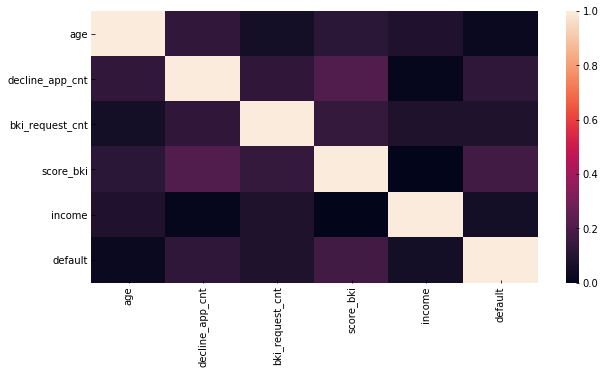

In [116]:
for_corr = num_cols + ['default']
sns.heatmap(train[for_corr].corr().abs(), vmin=0, vmax=1)

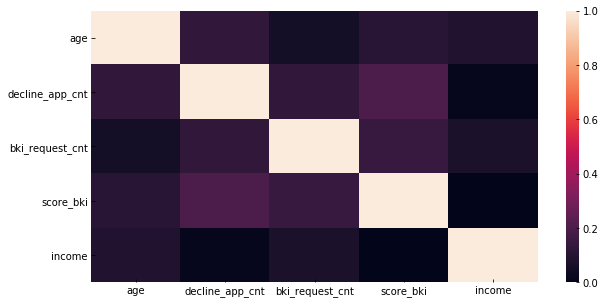

In [118]:
sns.heatmap(test[num_cols].corr().abs(), vmin=0, vmax=1)

In [119]:
# показатели между собой не сильно коррелируют
# Ещё есть параметр даты, который нужно преобразовать, чтобы использовать в анализе корреляции

In [120]:
train.app_date = pd.to_datetime(train.app_date, format='%d%b%Y')
test.app_date = pd.to_datetime(test.app_date, format='%d%b%Y')

In [124]:
train.app_date.value_counts()[:5]

2014-03-18    1018
2014-03-17     911
2014-03-19     909
2014-03-31     904
2014-04-07     882
Name: app_date, dtype: int64

In [125]:
test.app_date.value_counts()[:5]

2014-03-18    473
2014-03-19    454
2014-03-17    439
2014-04-01    425
2014-04-02    422
Name: app_date, dtype: int64

In [129]:
display (train.app_date.max())
display (test.app_date.max())

Timestamp('2014-04-30 00:00:00')

Timestamp('2014-04-30 00:00:00')

In [130]:
display (train.app_date.min())
display (test.app_date.min())

Timestamp('2014-01-01 00:00:00')

Timestamp('2014-01-01 00:00:00')

In [132]:
# В датасете приведены заявки с 1 января по 30 апреля 2014. 
#Добавлю новую переменную - количество дней с 1 января 2014 до даты заявки

In [133]:
first_dt = train.app_date.min()

In [138]:
train.dt_diff = (train.app_date - first_dt).dt.days.astype('int')
test.dt_diff = (test.app_date - first_dt).dt.days.astype('int')

/Users/habirova-rr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [162]:
#test.dt_diff = (test.app_date - first_dt).dt.days.astype('int')


0    80
1    23
2    81
3    33
4    34
Name: app_date, dtype: int64

In [140]:
display (train.dt_diff.value_counts()[:5])
display (test.dt_diff.value_counts()[:5])

76    1018
75     911
77     909
89     904
96     882
Name: app_date, dtype: int64

76    473
77    454
75    439
90    425
91    422
Name: app_date, dtype: int64

In [141]:
# Переменная app_date больше не нужна
train.drop(['app_date'], axis=1, inplace=True)
test.drop(['app_date'], axis=1, inplace=True)

Text(0.5, 1.0, 'Train')

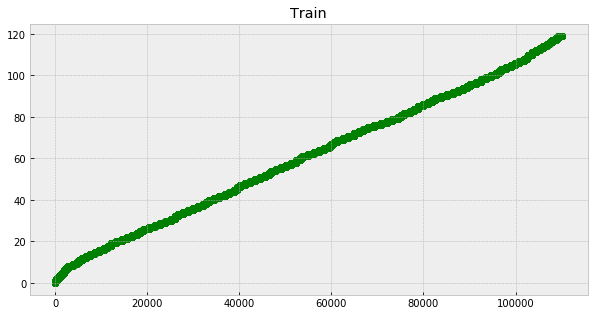

In [166]:
cl = train.client_id
dt = train.dt_diff

fig, ax = plt.subplots() 
ax.scatter(cl, dt, c = 'green') 
ax.set_title('Train')

Text(0.5, 1.0, 'Test')

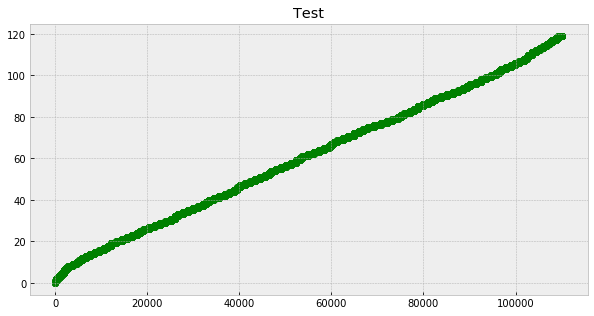

In [163]:

fig, ax = plt.subplots() 
ax.scatter(test.client_id, test.dt_diff, c = 'green') 
ax.set_title('Test')

In [167]:
# Явная корреляция между датами заказа и номером клиента, похоже на сквозную нумерацию
# Удалю из параметров client_id
train.drop(['client_id'], axis=1, inplace=True)

#### Значимость непрерывных переменных

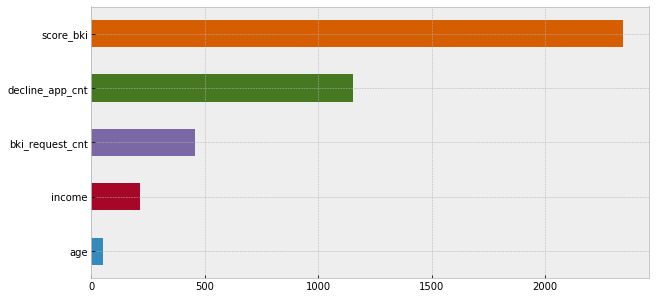

In [184]:
#num_cols.append('dt_diff')

imp_num = Series(f_classif(train[num_cols], train['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [185]:
# Самая значимая переменная - score_bki, самая малозначимая - возраст

#### Бинарные переменные

In [187]:
bin_cols

['sex', 'car', 'car_type', 'foreign_passport', 'good_work']

In [193]:
for i in bin_cols:
    print (i + ' принимает значения')
    print(train[i].value_counts())
    print ('\n')

sex принимает значения
F    41562
M    32237
Name: sex, dtype: int64


car принимает значения
N    49832
Y    23967
Name: car, dtype: int64


car_type принимает значения
N    59791
Y    14008
Name: car_type, dtype: int64


foreign_passport принимает значения
N    62733
Y    11066
Name: foreign_passport, dtype: int64


good_work принимает значения
0    61630
1    12169
Name: good_work, dtype: int64




In [194]:
# Для бинарных признаков мы будем использовать LabelEncoder

label_encoder = LabelEncoder()

for column in bin_cols:
    train[column] = label_encoder.fit_transform(train[column])
    test[column] = label_encoder.fit_transform(test[column])
    
# убедимся в преобразовании    
train.head()

,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,SCH,1,0.969893,1,1,0.000000,0,-2.008753,0.693147,50,1,2,9.798183,4,1,0,0
1,SCH,0,0.966273,0,0,0.000000,0,-1.532276,1.386294,50,2,3,9.852247,4,1,0,0
2,SCH,1,0.895607,1,0,1.098612,0,-1.408142,0.693147,80,1,2,10.308986,1,4,1,0
3,SCH,0,0.958289,0,0,0.000000,0,-2.057471,1.098612,50,2,3,9.210440,1,3,0,0
4,GRD,1,0.950717,0,0,0.000000,1,-1.244723,0.693147,60,2,3,10.308986,1,4,1,0


#### Категориальные переменные

In [196]:
# Нужно преобразовать education в категориальную переменную

In [197]:
label_encoder = LabelEncoder()
train['education'] = label_encoder.fit_transform(train['education'])
test['education'] = label_encoder.fit_transform(test['education'])

In [198]:
# Теперь можно оценить значимость

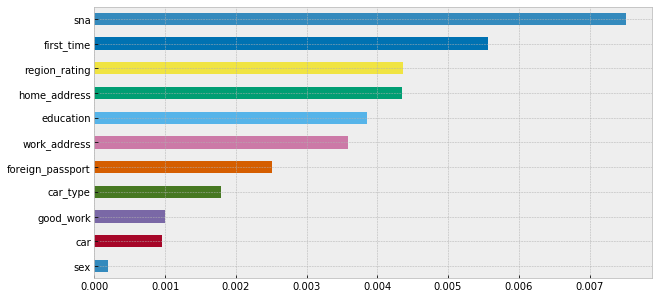

In [199]:
imp_cat = Series(mutual_info_classif(train[bin_cols + cat_cols], train['default'],
                                     discrete_features =True), index = bin_cols + cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

In [200]:
# Самой значимой переменной является sna, наименее значимой - пол

#### Подготовка данных к машинному обучению

In [201]:
X_cat = OneHotEncoder(sparse = False).fit_transform(train[cat_cols].values)
X_cat_test = OneHotEncoder(sparse = False).fit_transform(test[cat_cols].values)

In [202]:
# Стандартизация числовых переменных

X_num = StandardScaler().fit_transform(train[num_cols].values)
X_num_test = StandardScaler().fit_transform(test[num_cols].values)

In [203]:
# Объединяем

X = np.hstack([X_num, train[bin_cols].values, X_cat])
Y = train['default'].values
Test = np.hstack([X_num_test, test[bin_cols].values, X_cat_test])

In [205]:
# Проверяем размеры наборов train и test
display (train.shape)
display(test.shape) 
display(X.shape)
display(Test.shape)

(73799, 17)

(36349, 17)

(73799, 36)

(36349, 36)

#### Построение модели

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

/Users/habirova-rr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


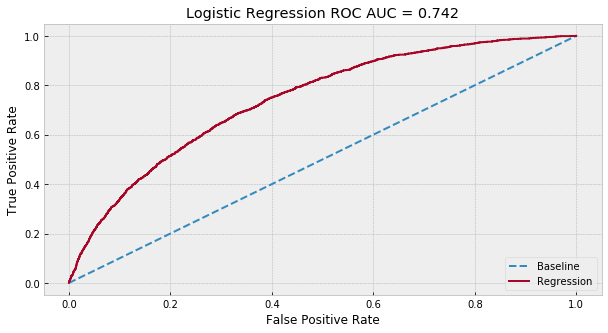

In [214]:
# Обучаем модель
model = LogisticRegression()
model.fit(X_train, y_train)

probs = model.predict_proba(X_test)
probs = probs[:,1]

y_pred_prob = model.predict_proba(X_test)[:,1]
y_pred = model.predict(X_test)

fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [221]:
print('accuracy_score = ', round(accuracy_score(y_test, y_pred),2))
print('precision_score = ', round(precision_score(y_test, y_pred),2))
print('recall_score = ', round(recall_score(y_test, y_pred),2))
print('f1_score = ', round(f1_score(y_test, y_pred),2))

accuracy_score =  0.88
precision_score =  0.43
recall_score =  0.02
f1_score =  0.04


In [259]:
# применим поиск гиперпараметров GridSearchCV 

In [258]:
C = np.logspace(0, 4, 10)
iter_ = 50
epsilon_stop = 1e-3
 
hyperparameters = [
    {'penalty': ['l1'], 
     'C': C,
     'solver': ['liblinear', 'lbfgs'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr'], 
     'max_iter':[iter_],
     'tol':[epsilon_stop]},
    {'penalty': ['l2'], 
     'C': C,
     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr'], 
     'max_iter':[iter_],
     'tol':[epsilon_stop]},
    {'penalty': ['none'], 
     'C': C,
     'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr'], 
     'max_iter':[iter_],
     'tol':[epsilon_stop]},
]

# Создаем сетку поиска с использованием 5-кратной перекрестной проверки
# указываем модель (в нашем случае лог регрессия), гиперпараметры
model = LogisticRegression(random_state=42)


# Создаем сетку поиска с использованием 5-кратной перекрестной проверки
gridsearch = GridSearchCV(model, hyperparameters, scoring='f1', n_jobs=-1, cv=5, verbose=0)

gridsearch.fit(X_train, y_train)

/Users/habirova-rr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                          'class_weight': ['none', 'balanced'],
                          'max_iter': [50], 'multi_class': ['auto', 'ovr'],
                          'penalty': ['l1'], 'so...
                          'tol': [0.001]},
                         {'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                          'class_weight': ['none', 'balanced'],
                          'max_iter': [50], 'multi_class': ['auto', 'ovr'],
                          'penalty': ['none'],
                          'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']

In [260]:
# View best hyperparameters
print('Лучшее Penalty:', gridsearch.best_estimator_.get_params()['penalty'])
print('Лучшее C:', gridsearch.best_estimator_.get_params()['C'])

Лучшее Penalty: l2
Лучшее C: 7.742636826811269


In [261]:
# Смотрим лучшие гиперпараметры
model_new = gridsearch.best_estimator_

# Предсказываем
y_pred_prob = model_new.predict_proba(X_test)[:,1]
y_pred = model_new.predict(X_test)

In [262]:
roc_auc = roc_auc_score(y_test, y_pred)

In [275]:
print ('ROC_AUC = ', round(roc_auc,2))

ROC_AUC =  0.68


In [264]:
print('accuracy_score = ', round(accuracy_score(y_test, y_pred),2))
print('precision_score = ', round(precision_score(y_test, y_pred),2))
print('recall_score = ', round(recall_score(y_test, y_pred),2))
print('f1_score = ', round(f1_score(y_test, y_pred),2))

accuracy_score =  0.67
precision_score =  0.22
recall_score =  0.69
f1_score =  0.34


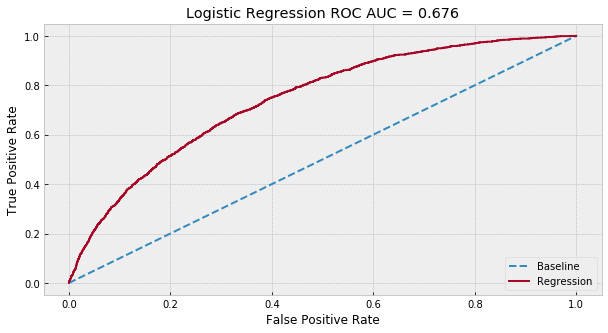

In [265]:
plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
# предсказательная сила улучшилась

#### Файлы для submission

In [273]:
subm_pred_prob = model_new.predict_proba(Test)[:,1]
subm_predict = model_new.predict(Test)

submission = pd.DataFrame({'client_id': test.client_id, 'default': submission_pred_prob})
submission.to_csv('submission.csv', index=False)

In [274]:
submission.head()

,client_id,default
0,74835,0.222663
1,17527,0.773402
2,75683,0.331112
3,26883,0.391777
4,28862,0.122664


In [276]:
submission.to_csv('/Users/habirova-rr/Downloads/submission.csv', index=False)